<a href="https://colab.research.google.com/github/anton2010000/EDA_Google_Playstore_App/blob/main/EDA_Google_Playstore_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/sample_data/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.shape

(10841, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.duplicated().sum()

483

In [94]:
df.rename(columns={'Content Rating': 'content_rating', 'Last Updated': 'last_updated','Current Ver': 'current_ver ','Android Ver': 'android_ver'}, inplace=True)

In [95]:
df.head(3)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,content_rating,Genres,last_updated,current_ver,android_ver,Size_in_Mb,Size_in_Kb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0,Medium
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8,Very High


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [12]:
df['Genres'].value_counts().head(27)

Tools                      842
Entertainment              623
Education                  549
Medical                    463
Business                   460
Productivity               424
Sports                     398
Personalization            392
Communication              387
Lifestyle                  381
Finance                    366
Action                     365
Health & Fitness           341
Photography                335
Social                     295
News & Magazines           283
Shopping                   260
Travel & Local             257
Dating                     234
Books & Reference          231
Arcade                     220
Simulation                 200
Casual                     193
Video Players & Editors    173
Puzzle                     140
Maps & Navigation          137
Food & Drink               127
Name: Genres, dtype: int64

Есть некоторые столбцы, которые являются объектами, а должны иметь числовой тип данных:   
['Reviews', 'Size', 'Installs', 'Price']

In [13]:
# checking any null values
df['Size'].isnull().sum()

0

In [14]:
# checking unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Считеам все ли уникальыне виды переменных мы нашли

In [15]:
a = df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()
a

8829

In [16]:
b = df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()
b

316

In [17]:
c = df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()
c

1695

In [18]:
a + b + c

10840

In [19]:
df['Size'].value_counts().sum()

10841

Разница в том, что размер имеет значение 10840, а набор данных имеет значение 10841

In [20]:
# конвертируем размер приложений
def convert_into_bytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k','')) * 1024     # 1kb = 1024 bytes
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024     # 1Mb = 1024*1024 bytes
        elif 'Varies with device' in size:
            return np.nan
    return (size)

In [21]:
df['Size'] = df['Size'].apply(convert_into_bytes)

In [22]:
df['Size'].head()

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
Name: Size, dtype: object

In [23]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [25]:
df['Size_in_Mb'] = df['Size'].apply(lambda x: x/ (1024 * 1024))
df['Size_in_Kb'] = df['Size'].apply(lambda x: x/ 1024)


In [26]:
df.rename(columns={'Size' : 'Size_in_bytes'}, inplace=True)

In [27]:
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
9783,Ankle Surgery ER Emergency,FAMILY,3.3,10449,30408704.0,"1,000,000+",Free,0,Teen,Educational,"December 2, 2016",1.7,2.3 and up,29.0,29696.0
5447,Body scanner (prank),FAMILY,3.3,16063,3984588.8,"1,000,000+",Free,0,Teen,Casual,"June 2, 2016",3.0,2.3 and up,3.8,3891.2
9489,Do Not Disturb! 2 - Challenge Your Prank Skills!,FAMILY,4.0,34417,50331648.0,"1,000,000+",Free,0,Everyone,Educational,"August 6, 2018",1.0.9,4.1 and up,48.0,49152.0


Теперь мы преобразовали каждое значение в байты, удалили M и K из значений, и преобразовали их в числовой тип данных.
«Varies with device» — строковое значение, поэтому мы преобразовали его в Null

In [28]:
df.describe()

,Rating,Size_in_bytes,Size_in_Mb,Size_in_Kb
count,9367.000000,9.145000e+03,9145.000000,9145.000000
mean,4.193338,2.256133e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.008301,8.500000
25%,4.000000,5.138022e+06,4.900000,5017.600000
50%,4.300000,1.363149e+07,13.000000,13312.000000
75%,4.500000,3.145728e+07,30.000000,30720.000000
max,19.000000,1.048576e+08,100.000000,102400.000000


Преобразуем данные колонки 'Installs' в удобный для обработки вид, избавимся от "+" преобразуем столбец в числовой тип данных.

In [29]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [30]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [31]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in x else x)

In [32]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', ''))

In [33]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [34]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [35]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

In [36]:
df['Installs'] = df['Installs'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size_in_bytes   9145 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_Mb      9145 non-null   float64
 14  Size_in_Kb      9145 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 1.2+ MB


In [38]:
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb
3019,MLB At Bat,SPORTS,4.2,82882,NaN,5000000,Free,0,Everyone,Sports,"July 30, 2018",Varies with device,Varies with device,NaN,NaN
5070,Auto Dslr Photo Effect : Auto Focus Effect,PHOTOGRAPHY,3.8,6,3670016.0,1000,Free,0,Everyone,Photography,"February 20, 2018",1.6,4.0.3 and up,3.5,3584.0
6833,BU Bison Nation,SPORTS,3.5,4,41943040.0,100,Free,0,Everyone,Sports,"September 21, 2017",6.0.2,4.4 and up,40.0,40960.0


Добавляем категории по количеству скачиваний к каждому приложению

In [39]:
bins = [ 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
lables = ['Very Low', 'Low', 'Medium', 'Medium+', 'High', 'Very High','Legend']
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=lables)

In [40]:
df.sample(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
2899,Camera for Android,PHOTOGRAPHY,4.2,240475,9961472.0,10000000,Free,0,Everyone,Photography,"November 22, 2017",3.8,4.0 and up,9.5,9728.0,Very High
6605,MI-BP,HEALTH_AND_FITNESS,5.0,1,12582912.0,50,Free,0,Everyone,Health & Fitness,"April 9, 2018",1.0.8.506,5.0 and up,12.0,12288.0,Low
9593,Poker Live! 3D Texas Hold'em,GAME,4.3,6143,38797312.0,100000,Free,0,Teen,Casino,"July 25, 2018",Varies with device,4.0.3 and up,37.0,37888.0,Medium+
1559,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221,2516582.4,500000,Free,0,Everyone,Libraries & Demo,"January 8, 2017",1.1,2.3 and up,2.4,2457.6,High
7249,Team CF,LIFESTYLE,NaN,0,3145728.0,100,Free,0,Everyone,Lifestyle,"June 7, 2018",3.9.9.2,2.3 and up,3.0,3072.0,Low


In [41]:
df['Installs_category'].value_counts()

Low          2161
High         2118
Very High    2004
Medium+      1648
Medium       1531
Legend        828
Very Low      535
Name: Installs_category, dtype: int64

Преобразуем значения в колонке 'Price'

In [42]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [43]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

Нам нужно избавиться от "$" и Everyone

In [44]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', "") if '$' in str(x) else x)

In [45]:
df['Price'] = df['Price'].apply(lambda x: x.replace('Everyone', '0') if 'Everyone' in x else x)

In [46]:
df['Price'].value_counts()

0        10041
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
19.90        1
1.75         1
14.00        1
4.85         1
1.04         1
Name: Price, Length: 92, dtype: int64

In [47]:
df['Price'] = df['Price'].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10841 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  object  
 4   Size_in_bytes      9145 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10841 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Size_in_Mb         9145 non-null   float64 
 14  Size_in_Kb         9145 non-null   float64 
 15  Installs_category  10825 non-null  category
dtypes: c

In [49]:
df.sample(3)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_Kb,Installs_category
1199,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935,NaN,10000000,Free,0.0,Everyone,Food & Drink,"July 20, 2018",Varies with device,Varies with device,NaN,NaN,Very High
6785,BT Controller,TOOLS,3.9,4374,13631488.0,1000000,Free,0.0,Everyone,Tools,"June 25, 2018",3.1.3,4.2 and up,13.0,13312.0,High
3493,SwiftKey Keyboard,PRODUCTIVITY,4.5,2764964,NaN,100000000,Free,0.0,Everyone,Productivity,"August 2, 2018",Varies with device,Varies with device,NaN,NaN,Legend


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338e+00,5.374313e-01,1.000000,4.0,4.3,4.5,1.900000e+01
Size_in_bytes,9145.0,2.256133e+07,2.368637e+07,8704.000000,5138022.4,13631488.0,31457280.0,1.048576e+08
Installs,10841.0,1.546291e+07,8.502557e+07,0.000000,1000.0,100000.0,5000000.0,1.000000e+09
Price,10841.0,1.027273e+00,1.594897e+01,0.000000,0.0,0.0,0.0,4.000000e+02
Size_in_Mb,9145.0,2.151617e+01,2.258908e+01,0.008301,4.9,13.0,30.0,1.000000e+02
Size_in_Kb,9145.0,2.203255e+04,2.313122e+04,8.500000,5017.6,13312.0,30720.0,1.024000e+05


In [51]:
df['Price'].max()

400.0

Преобразуем колонку 'Review'

In [52]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10841 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10840 non-null  float64 
 4   Size_in_bytes      9145 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10841 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Size_in_Mb         9145 non-null   float64 
 14  Size_in_Kb         9145 non-null   float64 
 15  Installs_category  10825 non-null  category
dtypes: c

In [54]:
df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [55]:
df['Rating'] = df['Rating'].replace(19, 4.3)
# заменяем выброс 19 на медианное значение

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.191769e+00,5.151926e-01,1.000000,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.000000,38.0,2094.0,54775.5,7.815831e+07
Size_in_bytes,9145.0,2.256133e+07,2.368637e+07,8704.000000,5138022.4,13631488.0,31457280.0,1.048576e+08
Installs,10841.0,1.546291e+07,8.502557e+07,0.000000,1000.0,100000.0,5000000.0,1.000000e+09
Price,10841.0,1.027273e+00,1.594897e+01,0.000000,0.0,0.0,0.0,4.000000e+02
Size_in_Mb,9145.0,2.151617e+01,2.258908e+01,0.008301,4.9,13.0,30.0,1.000000e+02
Size_in_Kb,9145.0,2.203255e+04,2.313122e+04,8.500000,5017.6,13312.0,30720.0,1.024000e+05


**Теперь у нас есть только 7 столбцов числового типа данных.
Мы можем применить описательную статистику и сделать массу наблюдений в соответствии с нашими гипотезами.**

Мы видим, что столбец «Рейтинг» имеет минимальное значение 1 и максимальное значение 5, что соответствует диапазону рейтинга, а среднее значение составляет 4,19, что является хорошим рейтингом.  

Мы видим, что столбец «Отзывы» имеет минимальное значение 0 и максимальное значение 78 158 306 78+ миллионов, что соответствует диапазону отзывов, а среднее значение составляет 444 111,93, что является хорошим показателем.
Точно так же мы можем наблюдать и за другими столбцами.

In [57]:
df.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 1
Size_in_bytes        1696
Installs                0
Type                    1
Price                   0
Content Rating          1
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             3
Size_in_Mb           1696
Size_in_Kb           1696
Installs_category      16
dtype: int64

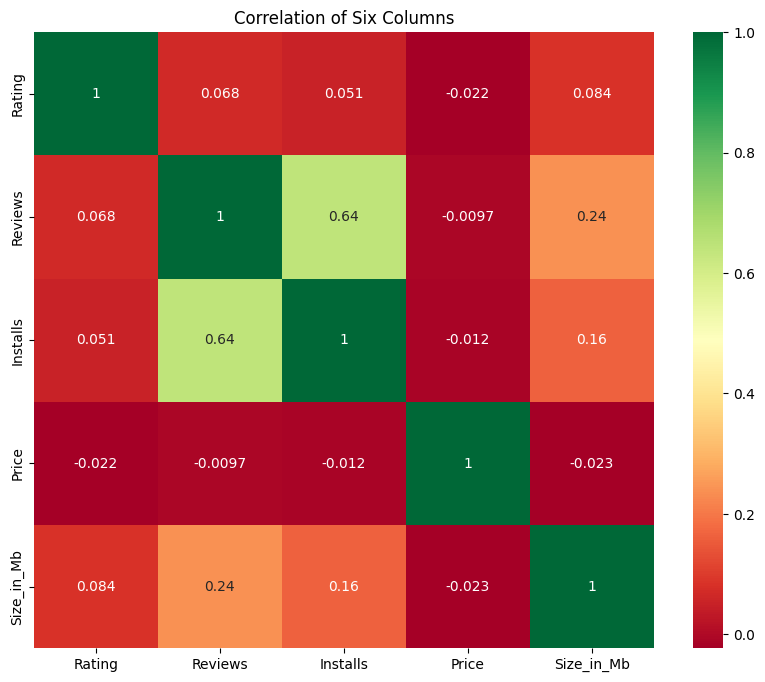

In [60]:
plt.figure(figsize=(10,8))
cor_cols = ['Rating', 'Reviews' , 'Installs', 'Price', 'Size_in_Mb']
plt.title("Correlation of Six Columns")
p=sns.heatmap(df[cor_cols].corr(),annot=True, cmap ='RdYlGn')

In [61]:
df[cor_cols].corr()

,Rating,Reviews,Installs,Price,Size_in_Mb
Rating,1.000000,0.068141,0.051350,-0.021905,0.083737
Reviews,0.068141,1.000000,0.643122,-0.009667,0.238214
Installs,0.051350,0.643122,1.000000,-0.011688,0.164787
Price,-0.021905,-0.009667,-0.011688,1.000000,-0.023007
Size_in_Mb,0.083737,0.238214,0.164787,-0.023007,1.000000


Более светлый цвет показывает высокую корреляцию, а более темный цвет показывает низкую корреляцию.  


Мы видим, что столбец «Отзывы» имеет высокую корреляцию со столбцом «Установки», которая по данным корреляции  составляет 0,64.  
  

Это показывает, что чем больше отзывов, тем больше установок у одного приложения.
  
  
Количество установок слегка коррелирует с размером приложения которое равно 0,16. Это также показывает нам важность размера и количества установок. Но мы не можем на это полагаться, поскольку корреляция очень низка.


В какой категории больше всего приложений?

In [67]:
df['Category'].value_counts().head(15)

FAMILY                1972
GAME                  1144
TOOLS                  843
MEDICAL                463
BUSINESS               460
PRODUCTIVITY           424
PERSONALIZATION        392
COMMUNICATION          387
SPORTS                 384
LIFESTYLE              382
FINANCE                366
HEALTH_AND_FITNESS     341
PHOTOGRAPHY            335
SOCIAL                 295
NEWS_AND_MAGAZINES     283
Name: Category, dtype: int64

В какой категории больше всего установок?

In [70]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(15)

Category
GAME                   35086024415
COMMUNICATION          32647276251
PRODUCTIVITY           14176091369
SOCIAL                 14069867902
TOOLS                  11452771915
FAMILY                 10258263505
PHOTOGRAPHY            10088247655
NEWS_AND_MAGAZINES      7496317760
TRAVEL_AND_LOCAL        6868887146
VIDEO_PLAYERS           6222002720
SHOPPING                3247848785
ENTERTAINMENT           2869160000
PERSONALIZATION         2325494782
BOOKS_AND_REFERENCE     1921469576
SPORTS                  1751174498
Name: Installs, dtype: int64

В какой категории больше всего отзывов?

In [71]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(15)

Category
GAME                  1.585422e+09
COMMUNICATION         8.154623e+08
SOCIAL                6.212414e+08
FAMILY                4.102263e+08
TOOLS                 2.731850e+08
PHOTOGRAPHY           2.135166e+08
SHOPPING              1.150412e+08
PRODUCTIVITY          1.141170e+08
VIDEO_PLAYERS         1.103802e+08
PERSONALIZATION       8.934614e+07
SPORTS                7.083017e+07
TRAVEL_AND_LOCAL      6.261792e+07
ENTERTAINMENT         5.917815e+07
NEWS_AND_MAGAZINES    5.440086e+07
EDUCATION             3.959579e+07
Name: Reviews, dtype: float64

Какая категория имеет самый высокий рейтинг?

In [73]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(15)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
1.9                    4.300000
PARENTING              4.300000
GAME                   4.286326
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.277104
SHOPPING               4.259664
SOCIAL                 4.255598
WEATHER                4.244000
SPORTS                 4.223511
PRODUCTIVITY           4.211396
Name: Rating, dtype: float64

У какого типа больше всего скачиваний?

In [79]:
df.groupby('Type')['Installs'].count()

Type
Free    10040
Paid      800
Name: Installs, dtype: int64

In [80]:
df['Type'] = df['Type'].replace('0', 'Free')

<Axes: ylabel='Type'>

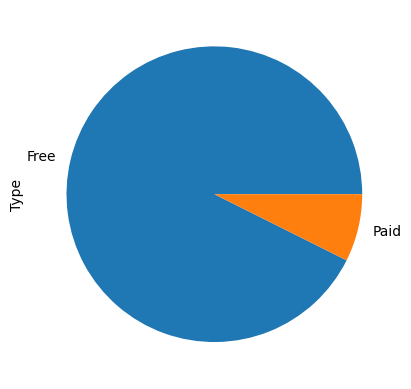

In [85]:
df['Type'].value_counts().plot(kind='pie')

Какая категория приложения имеет самый высокий рейтинг и количество скачиваний?

In [97]:
df['content_rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: content_rating, dtype: int64

<Axes: xlabel='content_rating', ylabel='Installs'>

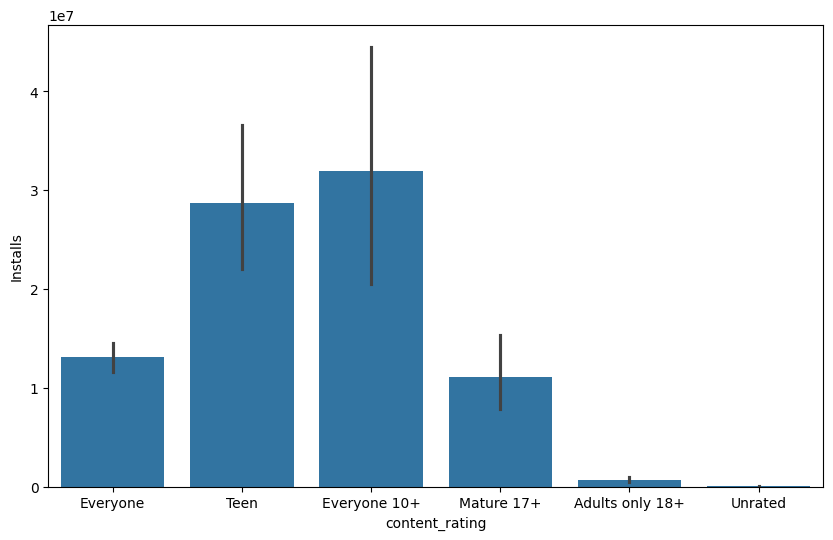

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x='content_rating', y='Installs', data=df)

<Axes: xlabel='content_rating', ylabel='Rating'>

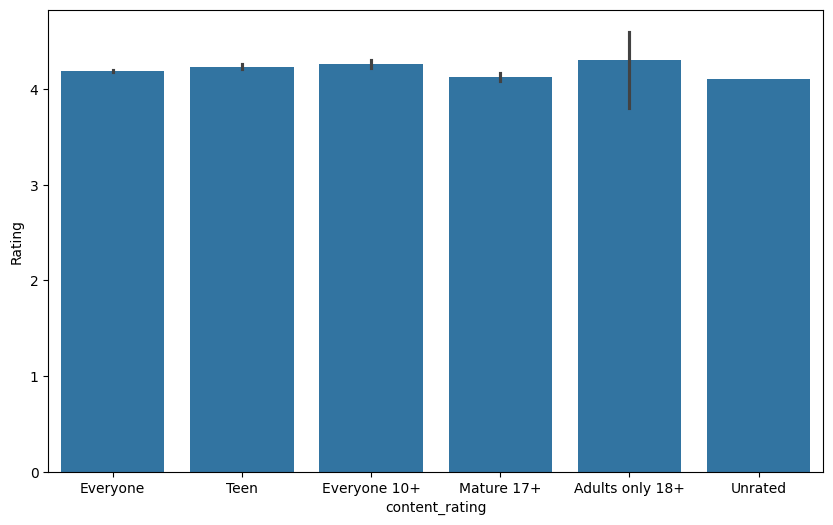

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x='content_rating', y='Rating', data=df)

Топ бесплатных и платных приложений по отзывам

<Axes: xlabel='App', ylabel='Reviews'>

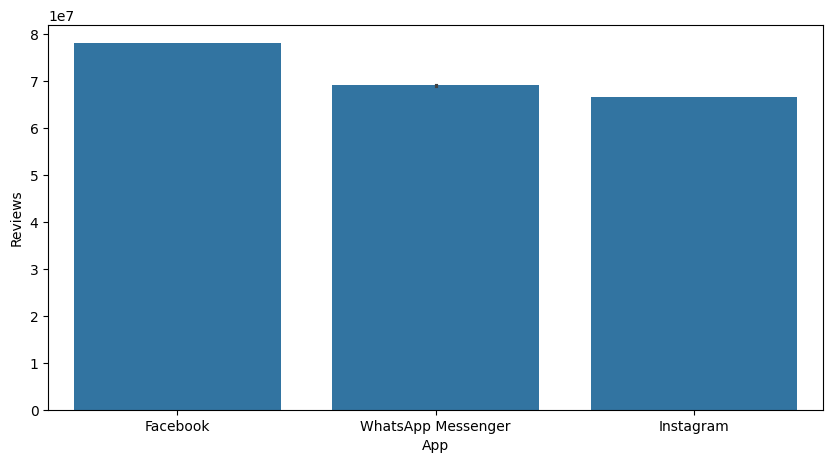

In [108]:
plt.figure(figsize=(10, 5))
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(8))

<Axes: xlabel='App', ylabel='Reviews'>

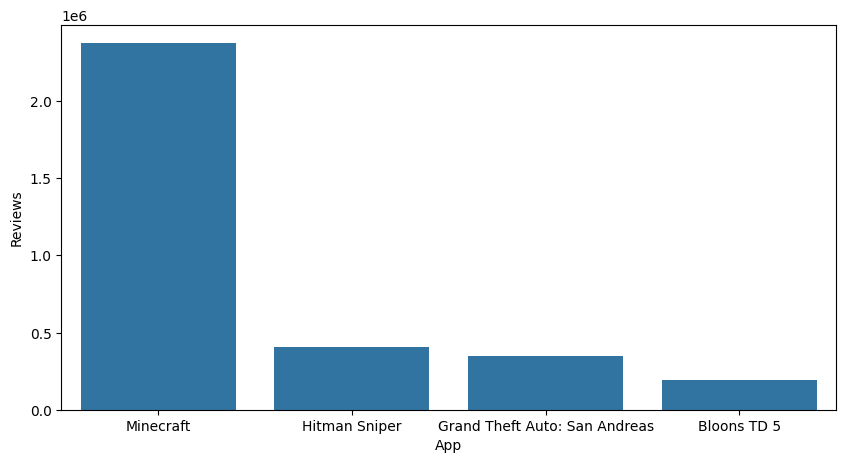

In [110]:
plt.figure(figsize=(10, 5))
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5))

Топ бесплатных и платных приложений по рейтингу

<Axes: xlabel='App', ylabel='Rating'>

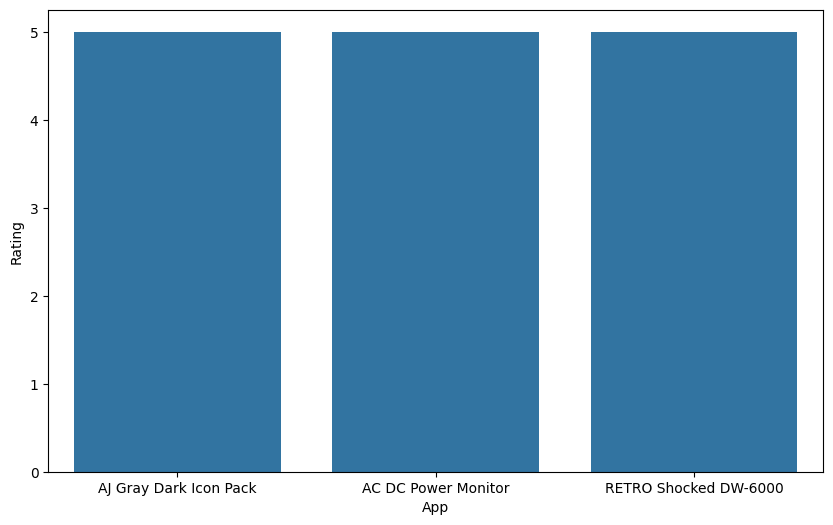

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(3))

<Axes: xlabel='App', ylabel='Rating'>

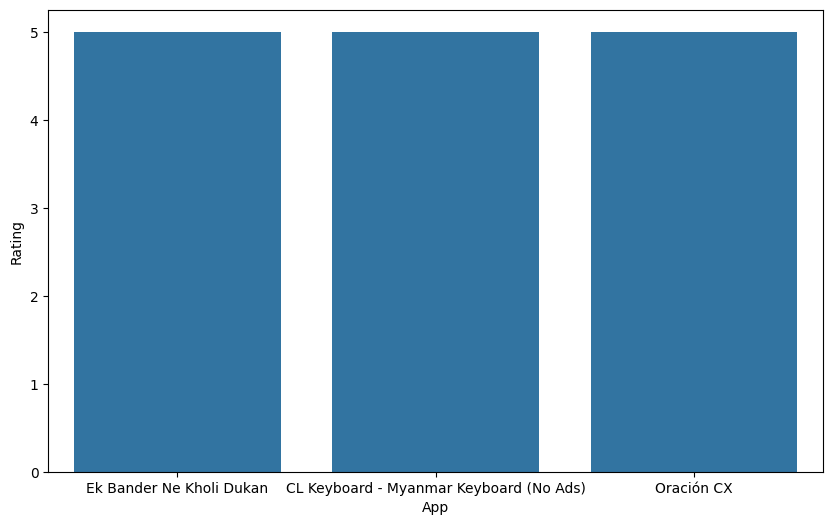

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by=['Rating','Installs'], ascending=False).head(3))